# 다층 퍼셉트론로 xor문제를 해결

In [8]:
import torch                        # 텐서 및 기본 연산 지원
import torch.nn as nn               # 신경망 모델 구성 도(nn.Linear, nn.Sequential 등)
import torch.optim as optim         # 최적화 알고리즘 (SGD, Adam 등)
import numpy as np


In [2]:
x = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [[0], [1], [1], [0]]



In [3]:
X= torch.FloatTensor(x) # 입력데이터 Tensor
y= torch.FloatTensor(y) # 정답 레이블 데이터 Tensor

print(X.shape)
print(y.shape)

torch.Size([4, 2])
torch.Size([4, 1])


In [ ]:
# 모델 정의 (다층 퍼셉트론)
model = nn.Sequential(
    nn.Linear(2, 4),   #입력 2개 -> 은닉층 4개
    nn.Tanh(),        # 은닉층의 활성화함수 (tanh는 신경망에 비선형성을 추가해준다.)
    nn.Linear(4, 1),  #은닉층 4개 -> 출력 1
    nn.Sigmoid()      #출력층 활성화함수 ()  
)

손실함수 BCELoss : 이진 분류용 손실 함수. Sigmoid 출력과 함께 사용

In [5]:
# 손실함수와 옵티마이저 설정
criterion = nn.BCELoss()  

optimizer = optim.SGD(     # 확률적 경사하강법 SGD
    model.parameters(),    # 학습할 가중치와 편향
    lr= 0.1                # 학습률
)

In [6]:
# 학습 루트
for epoch in range(10000):
    optimizer.zero_grad()           # 이전 step
    output = model(X)               # 순전파(forward pass): 입력 x값을 모델에 통과시켜 예측값 계산
    loss = criterion(output, y)     # 예측값(oupput)과 실게값(y)의 차이 측정 = 손실 계산
    loss.backward()                 # 역전파(backpropagation): 손실을 기준으로 각 파라미터 gradient 계산
    optimizer.step()                # 가중치 업데이트 : 계산된 gradient를 사용해 파라미터 업데이트
    
    if epoch % 1000 == 0 : 
         print(f"Epoch{epoch}: loss={loss.item():.4f}") # 소수점 4자리의 지수표현식으로 표현

# 결과 확인
with torch.no_grad():
     prediction = model(X).round()
     print("최종 예측:",prediction)

Epoch0: loss=0.7090
Epoch1000: loss=0.2335
Epoch2000: loss=0.0266
Epoch3000: loss=0.0127
Epoch4000: loss=0.0082
Epoch5000: loss=0.0060
Epoch6000: loss=0.0047
Epoch7000: loss=0.0039
Epoch8000: loss=0.0033
Epoch9000: loss=0.0029
최종 예측: tensor([[0.],
        [1.],
        [1.],
        [0.]])


XOR 정도 되는 비선형 문제를 해결할려면 은닉층 노드 수가 최소 2개 이상이어야 한다.

relu 활성화 함수 대신 tanh 함수 사용: 초기 학습 안정성에 도움이 된다.

출력층 Sigmoid 활성화 함수 + BCE 손실함수 : 이진분류에 매우 적합

## 시그모이드 함수 구현

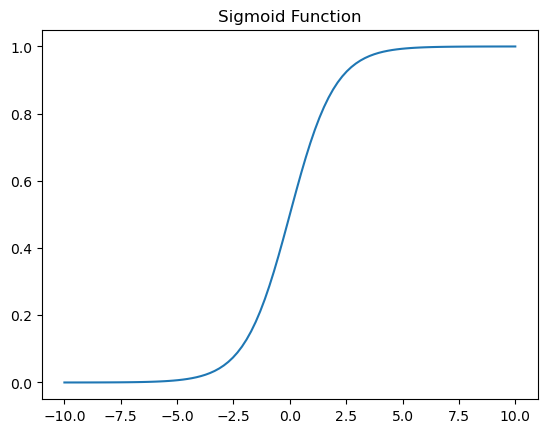

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

import matplotlib.pyplot as plt
plt.plot(x, y)
plt.title("Sigmoid Function")
plt.show()

- relu 함수의 특징
1. 기울기(함수가 얼마나 변하는가, 수학값으로는 미분값) 소실 문제 완화
    - 기울기가 1이다? 입력이 바뀌는 만큼 그대로 출력값도 바뀐다. => Relu 양수 기울기 1
    - lr는 하이퍼 파라미터 사용하면 가중치 업데이트시에 (lr * 기울기) 값으로 가중치값을 업데이트 해준다.
    - 결론적으로 역전파시 기울기가 줄어들지 않고 전달이 잘 된다. = 깊은 신경망에서도 신호가 잘 전달된다.

2. 계산 효율이 매우 높다.
    - 지수 계산이 없고 단순하게 비교 연산 => 대규모 모델 학습에 유리


한계점은 음수 영역에서 기울기가 0 -> Dead ReLU 문제 발생
=> Leaky ReLU, Parametric ReLU, ELU 등

결론적으로는 은닉층 활성화함수로 표준
하지만 출력층에서는 문제 유형에 따라 제한적으로 사용한다.